Philippe Joly 2025-06-07

# CHAIM Ionosphere Plasma Frequency Overview

This notebook is simply to llok over the A/E-CHAIM data and the critical plasma frequency across the observational times

In [31]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import sys
from os import path
sys.path.append(path.expanduser('~'))

## Import Data 

In [32]:
fns = [
    "/project/s/sievers/philj0ly/CHAIM/CSV/ACHAIM_nmf2.csv",
    "/project/s/sievers/philj0ly/CHAIM/CSV/ECHAIM_nmf2.csv"
]

achaim = pd.read_csv(fns[0])
echaim = pd.read_csv(fns[1])
dfs = [achaim, echaim]

for df in dfs:
    df["datetime"] = pd.to_datetime(df["datetime"], format="%y%m%d_%H%M%S")

In [33]:
eps = 8.8541878188 * 1e-12 # vacuum electric permittivity $\varepsilon_0$  [ F / m]
m_e = 9.1093837139 * 1e-31 # electron mass [ kg ]
e = 1.602176634  * 1e-19 # electron charge [ C ]

def get_plasma_freq(nmf2):
    w_p = np.sqrt( nmf2 * e**2 / (m_e * eps) )
    return w_p / (2*np.pi)

for df in dfs:
    df["plasma_freq"] = get_plasma_freq(df["nmf2"])

##  Data Visualisation

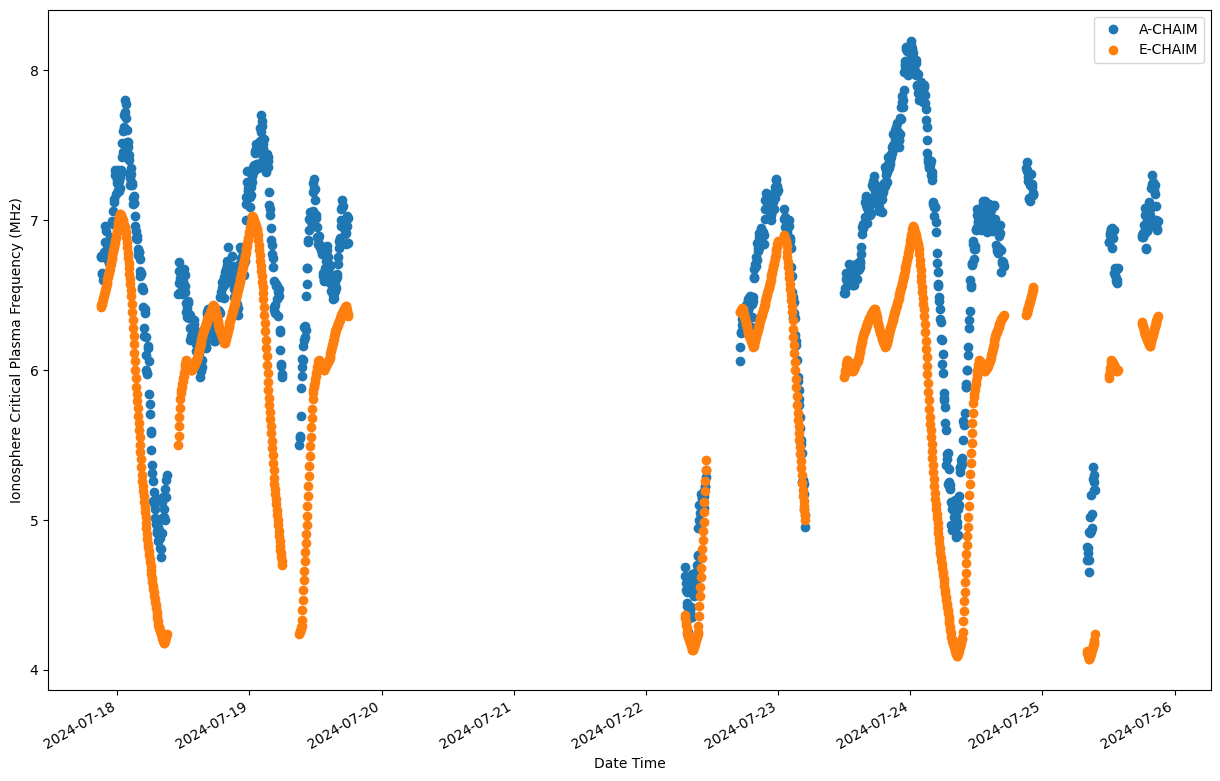

In [34]:
model = ['A-CHAIM','E-CHAIM']

fig, ax = plt.subplots(figsize=(15,10))

for i, df in enumerate(dfs):
    ax.scatter(df["datetime"], df["plasma_freq"]*1e-6, label=model[i])

# date_format = mdates.DateFormatter("%d_%H%M")
# ax.xaxis.set_major_formatter(date_format)
# plt.xticks(rotation=45)
# or
plt.gcf().autofmt_xdate()

plt.xlabel("Date Time")
plt.ylabel("Ionosphere Critical Plasma Frequency (MHz)")
plt.legend()
plt.show()    

We can clearly see the gaps in data during the observational period. 

It will be interesting to plot signal power vs plasma frequency during times where it oscillates around a certain bandwidth 